# DNA Sequencing using k-mer counting and NLP

Given dataset classifies the sequence to different class. Our intent of this notebook is to classify using Machine Learning model ( Mutinomial Naive Bayes Classifier ).

We use DNA Sequencing as language which is known as "K-mer counting" in world of GENOMICS.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_human = pd.read_table('human_data.txt')
data_human.head()

sequence  class
0  ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...      4
1  ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...      4
2  ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...      3
3  ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...      3
4  ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...      3

In [3]:
data_human["sequence"][0]

'ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCATACTCCTTACACTATTCCTCATCACCCAACTAAAAATATTAAACACAAACTACCACCTACCTCCCTCACCAAAGCCCATAAAAATAAAAAATTATAACAAACCCTGAGAACCAAAATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG'

We have sequences in first column whereas the class of sequences in second column.

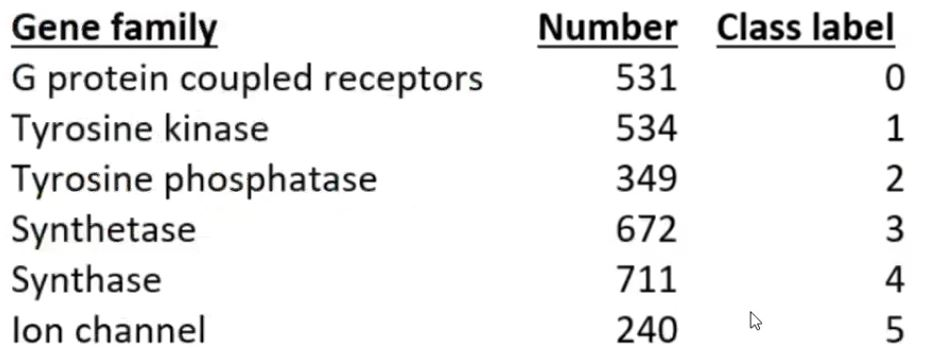

In [4]:
from IPython.display import Image
Image("Capture.jpg")

## Treating DNA sequence as a "language", otherwise known as k-mer counting 

A challenge that remains is that none of these above methods results in vectors of uniform length, and that is a requirement for feeding data to a classification or regression algorithm. So with the above methods you have to resort to things like truncating sequences or padding with "n" or "0" to get vectors of uniform length. 

DNA and protein sequences can be viewed metaphorically as the language of life. The language encodes instructions as well as function for the molecules that are found in all life forms. The sequence language analogy continues with the genome as the book, subsequences (genes and gene families) are sentences and chapters, k-mers and peptides (motifs) are words, and nucleotide bases and amino acids are the alphabet. Since the analogy seems so apt, it stands to reason that the amazing work done In the natural language processing field should also apply to the natural language of DNA and protein sequences. 

The method here is simple and easy. I first take the long biological sequence and break it down into k-mer length overlapping "words". For example, if I use "words" of length 6 (hexamers). "ATGCATGCA" becomes: 'ATGCAT', 'TGCATG'. 'GCATGC, 'CATGCA'. Hence our example sequence is broken down into 4 hexamer words. 

Here I am using hexamer "words" but that is arbitrary and word length can be tuned to suit the particular situation. The word length and amount of overlap need to be determined empirically for any given application.

## Applying K-mers to convert sequence strings to k-mer words, default size =6 (Hexamer)

In [5]:
#Defining the function
def getKmers(sequence,size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

In [6]:
#Apply in our dataset
data_human['words'] = data_human.apply(lambda x: getKmers(x['sequence']),axis=1)
data_human.head()

sequence  class  \
0  ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...      4   
1  ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...      4   
2  ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...      3   
3  ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...      3   
4  ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...      3   

                                               words  
0  [atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac...  
1  [atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa...  
2  [atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca...  
3  [atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca...  
4  [atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc...

In [9]:
data_human['words'][0]

['atgccc',
 'tgcccc',
 'gcccca',
 'ccccaa',
 'cccaac',
 'ccaact',
 'caacta',
 'aactaa',
 'actaaa',
 'ctaaat',
 'taaata',
 'aaatac',
 'aatact',
 'atacta',
 'tactac',
 'actacc',
 'ctaccg',
 'taccgt',
 'accgta',
 'ccgtat',
 'cgtatg',
 'gtatgg',
 'tatggc',
 'atggcc',
 'tggccc',
 'ggccca',
 'gcccac',
 'cccacc',
 'ccacca',
 'caccat',
 'accata',
 'ccataa',
 'cataat',
 'ataatt',
 'taatta',
 'aattac',
 'attacc',
 'ttaccc',
 'tacccc',
 'accccc',
 'ccccca',
 'ccccat',
 'cccata',
 'ccatac',
 'catact',
 'atactc',
 'tactcc',
 'actcct',
 'ctcctt',
 'tcctta',
 'ccttac',
 'cttaca',
 'ttacac',
 'tacact',
 'acacta',
 'cactat',
 'actatt',
 'ctattc',
 'tattcc',
 'attcct',
 'ttcctc',
 'tcctca',
 'cctcat',
 'ctcatc',
 'tcatca',
 'catcac',
 'atcacc',
 'tcaccc',
 'caccca',
 'acccaa',
 'cccaac',
 'ccaact',
 'caacta',
 'aactaa',
 'actaaa',
 'ctaaaa',
 'taaaaa',
 'aaaaat',
 'aaaata',
 'aaatat',
 'aatatt',
 'atatta',
 'tattaa',
 'attaaa',
 'ttaaac',
 'taaaca',
 'aaacac',
 'aacaca',
 'acacaa',
 'cacaaa',
 'acaaac',

In [14]:
data_human

sequence  class  \
0     ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...      4   
1     ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...      4   
2     ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...      3   
3     ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...      3   
4     ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...      3   
...                                                 ...    ...   
4375  ATGGAAGATTTGGAGGAAACATTATTTGAAGAATTTGAAAACTATT...      0   
4376  ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...      6   
4377  ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...      6   
4378  ATGGGGCACCTGGTTTGCTGTCTGTGTGGCAAGTGGGCCAGTTACC...      6   
4379  ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...      6   

                                                  words  
0     [atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac...  
1     [atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa...  
2     [atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca...  
3     [atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca...  
4     [atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc...  
...                                                 ...  
4375  [atggaa, tggaag, ggaaga, gaagat, aagatt, agatt...  
4376  [atgcag, tgcagt, gcagtc, cagtcc, agtcct, gtcct...  
4377  [atgcag, tgcagt, gcagtc, cagtcc, agtcct, gtcct...  
4378  [atgggg, tggggc, ggggca, gggcac, ggcacc, gcacc...  
4379  [atgcag, tgcagt, gcagtc, cagtcc, agtcct, gtcct...  

[4380 rows x 3 columns]

In [15]:
data_human = data_human.drop('sequence',axis=1)

In [16]:
data_human

class                                              words
0         4  [atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac...
1         4  [atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa...
2         3  [atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca...
3         3  [atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca...
4         3  [atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc...
...     ...                                                ...
4375      0  [atggaa, tggaag, ggaaga, gaagat, aagatt, agatt...
4376      6  [atgcag, tgcagt, gcagtc, cagtcc, agtcct, gtcct...
4377      6  [atgcag, tgcagt, gcagtc, cagtcc, agtcct, gtcct...
4378      6  [atgggg, tggggc, ggggca, gggcac, ggcacc, gcacc...
4379      6  [atgcag, tgcagt, gcagtc, cagtcc, agtcct, gtcct...

[4380 rows x 2 columns]

Using Scikit-learn NLP to do K-mer couting using count vectorizer to convert list of words to sentences

In [17]:
human_texts = list(data_human['words'])

In [18]:
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])

In [19]:
human_texts

['atgccc tgcccc gcccca ccccaa cccaac ccaact caacta aactaa actaaa ctaaat taaata aaatac aatact atacta tactac actacc ctaccg taccgt accgta ccgtat cgtatg gtatgg tatggc atggcc tggccc ggccca gcccac cccacc ccacca caccat accata ccataa cataat ataatt taatta aattac attacc ttaccc tacccc accccc ccccca ccccat cccata ccatac catact atactc tactcc actcct ctcctt tcctta ccttac cttaca ttacac tacact acacta cactat actatt ctattc tattcc attcct ttcctc tcctca cctcat ctcatc tcatca catcac atcacc tcaccc caccca acccaa cccaac ccaact caacta aactaa actaaa ctaaaa taaaaa aaaaat aaaata aaatat aatatt atatta tattaa attaaa ttaaac taaaca aaacac aacaca acacaa cacaaa acaaac caaact aaacta aactac actacc ctacca taccac accacc ccacct caccta acctac cctacc ctacct tacctc acctcc cctccc ctccct tccctc ccctca cctcac ctcacc tcacca caccaa accaaa ccaaag caaagc aaagcc aagccc agccca gcccat cccata ccataa cataaa ataaaa taaaaa aaaaat aaaata aaataa aataaa ataaaa taaaaa aaaaaa aaaaat aaaatt aaatta aattat attata ttataa tataac ataaca taacaa aacaaa acaa

In [27]:
y = data_human.iloc[:,0].values
y

array([4, 4, 3, ..., 6, 6, 6], dtype=int64)

In [21]:
print(human_texts[0])

atgccc tgcccc gcccca ccccaa cccaac ccaact caacta aactaa actaaa ctaaat taaata aaatac aatact atacta tactac actacc ctaccg taccgt accgta ccgtat cgtatg gtatgg tatggc atggcc tggccc ggccca gcccac cccacc ccacca caccat accata ccataa cataat ataatt taatta aattac attacc ttaccc tacccc accccc ccccca ccccat cccata ccatac catact atactc tactcc actcct ctcctt tcctta ccttac cttaca ttacac tacact acacta cactat actatt ctattc tattcc attcct ttcctc tcctca cctcat ctcatc tcatca catcac atcacc tcaccc caccca acccaa cccaac ccaact caacta aactaa actaaa ctaaaa taaaaa aaaaat aaaata aaatat aatatt atatta tattaa attaaa ttaaac taaaca aaacac aacaca acacaa cacaaa acaaac caaact aaacta aactac actacc ctacca taccac accacc ccacct caccta acctac cctacc ctacct tacctc acctcc cctccc ctccct tccctc ccctca cctcac ctcacc tcacca caccaa accaaa ccaaag caaagc aaagcc aagccc agccca gcccat cccata ccataa cataaa ataaaa taaaaa aaaaat aaaata aaataa aataaa ataaaa taaaaa aaaaaa aaaaat aaaatt aaatta aattat attata ttataa tataac ataaca taacaa aacaaa acaaac

## Lets apply BAGS of WORDS using CountVectorizer using NLP 

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))

In [23]:
X = cv.fit_transform(human_texts)
print(X.shape)

(4380, 232414)


In [24]:
X

<4380x232414 sparse matrix of type '<class 'numpy.int64'>'
	with 5406441 stored elements in Compressed Sparse Row format>

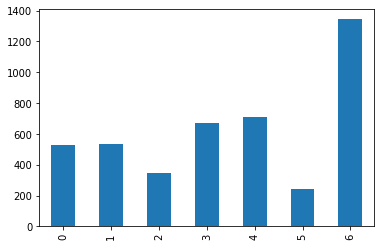

In [26]:
#Data is pretty much balanced dependent varaible.
data_human['class'].value_counts().sort_index().plot.bar()

In [28]:
#Splitting the human dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [29]:
print(X_train.shape)
print(X_test.shape)

(3504, 232414)
(876, 232414)


In [33]:
X_train

<3504x232414 sparse matrix of type '<class 'numpy.int64'>'
	with 4318484 stored elements in Compressed Sparse Row format>

## Buliding ML Model using Multinomial naive Bayes Classifier 

In [35]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1) #alpha = 0.1 is determined by GRIDSERCHCV hypertuning
classifier.fit(X_train,y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [36]:
y_pred = classifier.predict(X_test)

In [37]:
y_pred

array([2, 0, 4, 6, 3, 6, 4, 2, 6, 6, 0, 6, 0, 6, 6, 6, 6, 1, 4, 1, 6, 3,
       4, 4, 4, 6, 0, 6, 6, 6, 2, 6, 3, 6, 3, 0, 0, 6, 3, 4, 3, 0, 6, 5,
       3, 0, 6, 6, 1, 2, 1, 3, 0, 5, 0, 5, 2, 6, 4, 1, 5, 1, 4, 4, 4, 4,
       4, 3, 4, 2, 2, 3, 4, 5, 0, 3, 6, 1, 6, 1, 4, 1, 6, 3, 1, 6, 6, 4,
       1, 2, 6, 3, 4, 3, 1, 1, 6, 6, 1, 1, 5, 1, 6, 3, 6, 4, 4, 1, 2, 0,
       6, 3, 5, 4, 6, 6, 5, 6, 6, 6, 3, 0, 0, 4, 4, 1, 2, 0, 4, 6, 5, 2,
       5, 6, 1, 2, 4, 4, 6, 1, 3, 2, 3, 5, 6, 6, 1, 5, 6, 4, 3, 6, 6, 6,
       6, 2, 3, 6, 0, 6, 6, 3, 1, 0, 5, 2, 4, 2, 1, 4, 5, 4, 6, 6, 6, 6,
       6, 3, 6, 4, 2, 2, 1, 1, 2, 6, 6, 6, 6, 0, 4, 0, 4, 2, 1, 2, 3, 0,
       6, 4, 6, 1, 2, 1, 4, 4, 3, 5, 6, 6, 6, 0, 4, 1, 0, 1, 3, 3, 5, 0,
       6, 0, 0, 6, 3, 0, 0, 6, 5, 2, 0, 1, 5, 3, 1, 1, 6, 6, 1, 3, 2, 4,
       3, 6, 6, 3, 4, 6, 4, 4, 0, 3, 4, 3, 6, 1, 4, 6, 6, 6, 6, 0, 0, 6,
       6, 6, 6, 4, 4, 3, 3, 1, 4, 6, 4, 6, 4, 2, 3, 2, 6, 3, 3, 6, 2, 6,
       6, 1, 1, 5, 0, 5, 3, 1, 3, 6, 2, 2, 4, 1, 6,

## Evaluation of prediction using Confusion Matrix, Accuracy , Precision, Recall n F1 score 

In [41]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix

In [39]:
print("Confusion Matrix : \n")
print(pd.crosstab(pd.Series(y_test,name='Actual'),pd.Series(y_pred,name='Predicted')))

Confusion Matrix : 

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    1   0    2
1           0  104   0    0    0   0    2
2           0    0  78    0    0   0    0
3           0    0   0  124    0   0    1
4           1    0   0    0  143   0    5
5           0    0   0    0    0  51    0
6           1    0   0    1    0   0  263


In [42]:
print(confusion_matrix(y_test,y_pred))

[[ 99   0   0   0   1   0   2]
 [  0 104   0   0   0   0   2]
 [  0   0  78   0   0   0   0]
 [  0   0   0 124   0   0   1]
 [  1   0   0   0 143   0   5]
 [  0   0   0   0   0  51   0]
 [  1   0   0   1   0   0 263]]


In [44]:
def get_metrics(y_test,y_pred):
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred,average='weighted')
    recall = recall_score(y_test,y_pred,average='weighted')
    f1 = f1_score(y_test,y_pred,average='weighted')
    return accuracy,precision,recall,f1

In [45]:
accuracy,precision,recall,f1 = get_metrics(y_test,y_pred)

In [49]:
print(" Accuracy : %.3f\n Precision : %.3f\n Recall : %.3f\n F1 : %.3f\n"%(accuracy,precision,recall,f1))

 Accuracy : 0.984
 Precision : 0.984
 Recall : 0.984
 F1 : 0.984



In [51]:
X_test

<876x232414 sparse matrix of type '<class 'numpy.int64'>'
	with 1087957 stored elements in Compressed Sparse Row format>